In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Loading dataset

In [2]:
df=pd.read_csv('car_age_price.csv')

In [3]:
df

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


### Basic details

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [5]:
df.shape

(112, 2)

In [6]:
df.columns

Index(['Year', 'Price'], dtype='object')

In [7]:
df.isna().sum()

Year     0
Price    0
dtype: int64

In [8]:
df.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [9]:
df['Year'].nunique()

8

In [10]:
corrmatrix=df.corr()

In [11]:
corrmatrix

,Year,Price
Year,1.000000,0.776302
Price,0.776302,1.000000


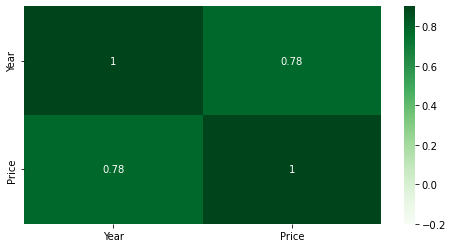

In [12]:
plt.subplots(figsize=(8,4))
sns.heatmap(corrmatrix,vmin=-0.2, vmax= 0.9,annot=True,cmap='Greens')
plt.show()

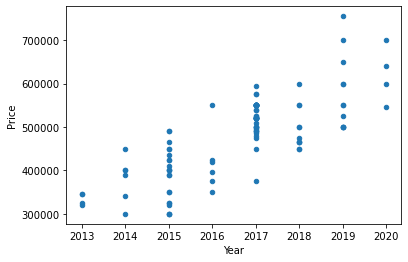

In [13]:
df.plot.scatter(x='Year',y='Price')
plt.show()

In [14]:
df['Year'].nunique()

8

In [15]:
df['Year'].unique()

array([2018, 2019, 2015, 2016, 2017, 2020, 2013, 2014], dtype=int64)

In [16]:
X=df.drop('Price',axis=1)
y=df.drop('Year',axis=1)

In [18]:
# split the dataset to train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 


In [19]:
##let's fit the data

In [20]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [21]:
model1=lr.fit(X_train,y_train)

In [22]:
#let's make a prediction
pred2=model1.predict([[2022]])    
print('Price for the year 2022 is:',pred2)

Price for the year 2022 is: [[743601.61594504]]


#### Possible price of a 2022 model second-hand grand i10, using linear regression  is Rs 743601/-

In [23]:
pred1=model1.predict(X_test)


In [24]:
#mean squared error and R squared value
from sklearn.metrics import mean_squared_error,r2_score

In [25]:
print('Mean squared error is:',mean_squared_error(y_test,pred1))
print('R squared error is:',r2_score(y_test,pred1))

Mean squared error is: 4326906256.829671
R squared error is: 0.36759313425902185


In [26]:
print("RMSE value is:",np.sqrt(mean_squared_error(y_test,pred1)))

RMSE value is: 65779.22359552195


In [27]:
lr.score(X_train,y_train)

0.6389354253755697

In [28]:
lr.score(X_test,y_test)

0.36759313425902185

#### This is  case of overfitting, perfomance is good  with training data and perfomance is not good for test data

### Lasso Regression

In [95]:
from sklearn.linear_model import Lasso


In [96]:
lasso=Lasso(alpha=7000)

In [97]:
model3=lasso.fit(X_train,y_train)

In [98]:
y_pred=model3.predict(X_test)

In [102]:
#let's make a prediction using Lasso regression
prd = lasso.predict([[2022]]) 
print("For the year 2022 the car Price will be:", prd)

For the year 2022 the car Price will be: [727909.90070774]


#### possible price of a 2022 model second-hand grand i10, using lasso regression is Rs 727910/-

In [99]:
from sklearn.metrics import mean_squared_error
print('mean_squared_error:',mean_squared_error(y_test,y_pred))
print('the r squared value is',r2_score(y_test,y_pred))

mean_squared_error: 4030522275.2471113
the r squared value is 0.4109116749721715


In [100]:
print("RMSE value is:",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE value is: 63486.39441051217


#### By comparing both regression methods, we can say there is reduction in mean square error value for lasso regression.Lasso and ridge regression can be used in overfitting cases.By adding slight amount of bias, prediction will be better.Lasso regression can exclude useless variables from equation(in complex situations) too.

In [ ]:
#we can use CV to find best value of alpha

#from sklearn.model_selection import GridSearchCV 
#lasso=Lasso()
#parameters={"alpha":[1e-15,1e-10,1e-6,1e-8,1e-3,1e-2,0.05,0.01,0.1,0.25,0.5,0.8,0.9,0.99,1,5,10,20,30,35,40,50,55,60,100]}
#lasso_regressor=GridSearchCV(lasso,parameters,scoring="neg_mean_squared_error",cv=5)
#lasso_regressor.fit(X,y)
#print(lasso_regressor.best_params_)
#print(lasso_regressor.best_score_)

 #### Slope and Intercept

In [36]:
print('slope:%.2f' % lasso.coef_[0])

slope:47608.57


In [37]:
print('Intercepts:%.2f'%lasso.intercept_)

Intercepts:-95520922.49
